# Importing the necessary library

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('C:/Users/USER.RASTEK/Documents/HSE_Injury_Inventory_2024.csv')

In [44]:
df

,Employee_ID,Department,Job_Role,Injury_Occurrence,Injury_Type,Injury_Severity,Date_of_Injury,Shift,Years_of_Experience,PPE_Compliance_Score
0,1,Administrative & Facilities Management,Administrative Assistant,Yes,Trip Injury,Severe,1/1/2024,Night,1,35
1,2,"Health, Safety, and Environment (HSE)",Environmental Health and Safety Specialist,Yes,Minor Exposure Injury,Minor,1/20/2024,Night,10,86
2,3,Supply Chain & Procurement,Procurement Officer,Yes,Slip and Fall(Bruises),Severe,2/8/2024,Night,5,30
3,4,"Health, Safety, and Environment (HSE)",HSE Officer/Coordinator,Yes,Chemical Splash,Moderate,2/27/2024,Night,10,80
4,5,Supply Chain & Procurement,Warehouse Supervisor,Yes,Back Strain,Minor,3/17/2024,Night,11,85
5,6,"Engineering, Packaging & Quality Assurance",Quality Assurance Inspector,Yes,Ergonomic Injury,Moderate,4/6/2024,Night,8,60
6,7,Technical & Production,Operations Manager,Yes,Back Strain,Moderate,4/25/2024,Afternoon,4,65
7,8,Technical & Production,Equipment Maintenance Specialist,Yes,Electrical Shock,Severe,5/14/2024,Night,2,40
8,9,Administrative & Facilities Management,Facilities Coordinator,Yes,Falling Object Injury,Moderate,6/2/2024,Night,3,50
9,10,Administrative & Facilities Management,Facilities Coordinator,Yes,Falling Object Injury,Minor,6/21/2024,Morning,7,75


## Making a duplicate of the data so any changes made won't affect the original data

In [45]:
df_copy = df.copy()

df_copy

# Descriptive Analysis

In [46]:
# Descriptive statistics for Years of Experience and PPE Compliance Score
df_copy[['Years_of_Experience', 'PPE_Compliance_Score']].describe()


,Years_of_Experience,PPE_Compliance_Score
count,20.000000,20.000000
mean,6.350000,58.300000
std,3.453069,19.892077
min,1.000000,30.000000
25%,4.000000,40.000000
50%,7.000000,57.500000
75%,8.000000,80.000000
max,14.000000,86.000000


## Frequency Counts for Categorical Columns


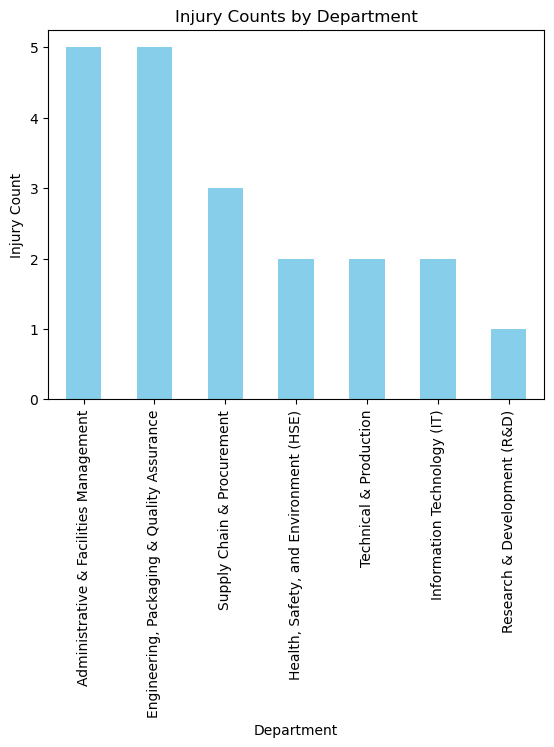

In [47]:
# Department injury counts
df_copy['Department'].value_counts()

# Count the number of injuries per department
department_counts = df_copy['Department'].value_counts()

# Create a bar chart
department_counts.plot(kind='bar', color='skyblue')

#Adding titles and labels
plt.title('Injury Counts by Department')
plt.xlabel('Department')
plt.ylabel('Injury Count')

# Show the plot
plt.show()

In [48]:
# Job Role injury counts
df_copy['Job_Role'].value_counts()

Job_Role
Administrative Assistant                      3
Procurement Officer                           2
Facilities Coordinator                        2
IT Support Specialist                         2
Environmental Health and Safety Specialist    1
HSE Officer/Coordinator                       1
Warehouse Supervisor                          1
Quality Assurance Inspector                   1
Operations Manager                            1
Equipment Maintenance Specialist              1
R&D Lab Technician                            1
Production Engineer                           1
Maintenance Technician                        1
Supply Chain Quality Manager                  1
Packaging Engineer                            1
Name: count, dtype: int64

In [49]:
# Injury Type counts
df_copy['Injury_Type'].value_counts()

Injury_Type
Back Strain                 4
Trip Injury                 3
Slip and Fall(Bruises)      2
Falling Object Injury       2
Repetitive Strain Injury    2
Minor Exposure Injury       1
Chemical Splash             1
Ergonomic Injury            1
Electrical Shock            1
Chemical Burn               1
Burn Injury                 1
Cut Injury                  1
Name: count, dtype: int64

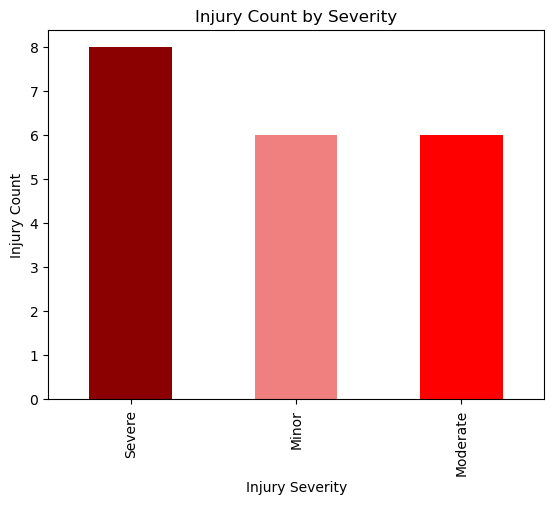

In [50]:
# Injury Severity counts
df_copy['Injury_Severity'].value_counts()
injury_severity_counts = df_copy['Injury_Severity'].value_counts()

# Define color mapping for each severity level
color_mapping = {
    'Severe': 'darkred',  # Dark red for severe
    'Moderate': 'red',    # Red for moderate
    'Minor': 'lightcoral' # Lighter red for minor
}
# Map colors based on injury severity
colors = injury_severity_counts.index.map(color_mapping)


# Creating a bar chart
injury_severity_counts.plot(kind='bar', color=colors)

# Adding titles and labels
plt.title('Injury Count by Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Injury Count')

# Show the plot
plt.show()

In [51]:
df_copy['Injury_Severity'].value_counts(normalize=True) * 100

Injury_Severity
Severe      40.0
Minor       30.0
Moderate    30.0
Name: proportion, dtype: float64

## Injury Occurance by shift

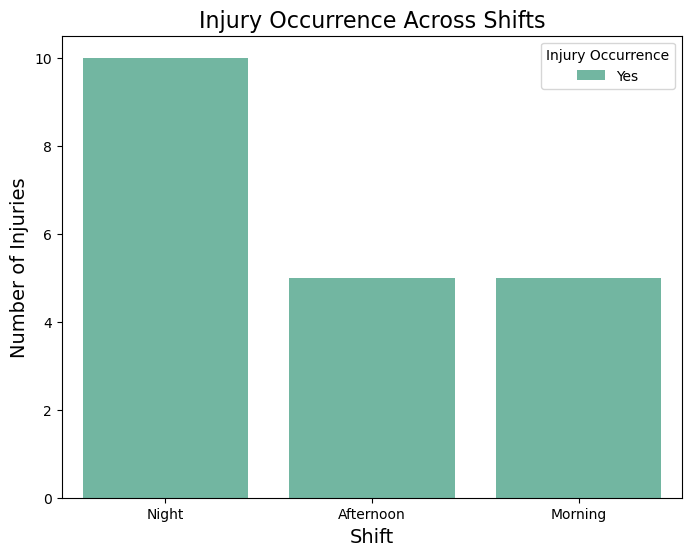

In [52]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Shift', hue='Injury_Occurrence', palette='Set2')
plt.title('Injury Occurrence Across Shifts', fontsize=16)
plt.xlabel('Shift', fontsize=14)
plt.ylabel('Number of Injuries', fontsize=14)
plt.legend(title='Injury Occurrence')
plt.show()

# Inferential Analysis

### Checking for Normal Distribution to know if we will be using Parametric or Non Parametric Test

#### Visual Check - Histogram

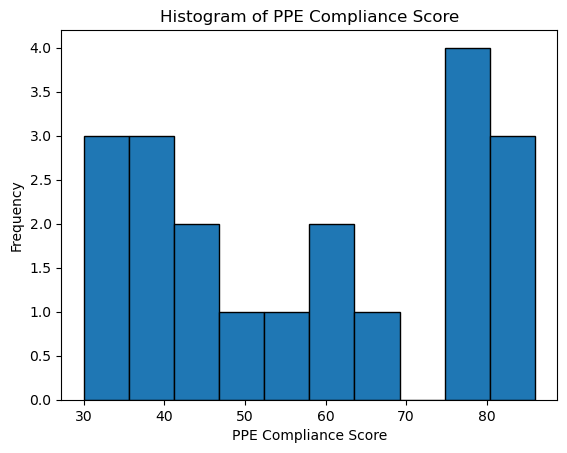

In [53]:
# Plot Histogram
plt.hist(df_copy['PPE_Compliance_Score'], bins=10, edgecolor='black')
plt.title('Histogram of PPE Compliance Score')
plt.xlabel('PPE Compliance Score')
plt.ylabel('Frequency')
plt.show()

Using Histogram to check for normality. The data is not normally distributed.

### Visual Check - Q-Q Plot

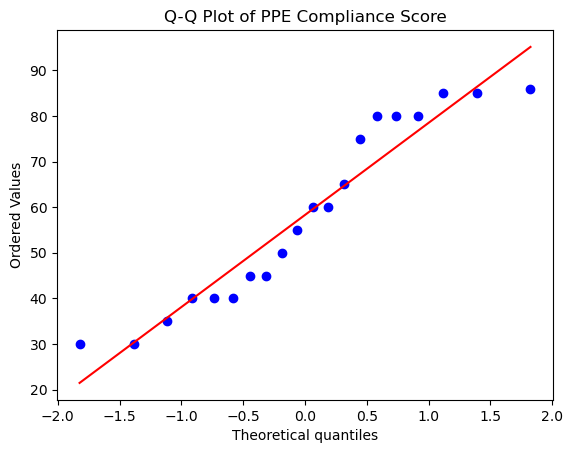

In [54]:
import scipy.stats as stats
# Q-Q plot
stats.probplot(df_copy['PPE_Compliance_Score'], dist="norm", plot=plt)
plt.title('Q-Q Plot of PPE Compliance Score')
plt.show()


#### Statistical Check - Shapiro-Wilk Test

In [55]:
from scipy.stats import shapiro, kruskal

# Step 1: Check normality of PPE Compliance Score
stat, p = shapiro(df_copy['PPE_Compliance_Score'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Data looks normal. We can use ANOVA.')
else:
    print('Data is NOT normal. Use Kruskal-Wallis Test instead.')

Shapiro-Wilk Test: Statistics=0.902, p=0.046
Data is NOT normal. Use Kruskal-Wallis Test instead.


## Since the data is not normal, we will be using the kruskal-wallis test which is the non-parametric method for Anova

In [56]:
# Step 2: Kruskal-Wallis Test
# Group the PPE scores by Injury Severity
groups = [df_copy[df_copy['Injury_Severity'] == severity]['PPE_Compliance_Score']
          for severity in df_copy['Injury_Severity'].unique()]

# Perform Kruskal-Wallis Test
stat_kw, p_kw = kruskal(*groups)

print(f'Kruskal-Wallis Test Statistic: {stat_kw:.3f}')
print(f'p-value: {p_kw:.3f}')

# Interpretation
if p_kw < 0.05:
    print('There is a significant difference in PPE Compliance Score across Injury Severity levels.')
else:
    print('There is NO significant difference in PPE Compliance Score across Injury Severity levels.')

Kruskal-Wallis Test Statistic: 16.299
p-value: 0.000
There is a significant difference in PPE Compliance Score across Injury Severity levels.


### Since there's a significant difference in PPE Compliance score across Injury Severity levels, we will be carrying out a Post Hoc Analysis to see which pair of Injury Severity are different.¶

#### We’ll use Dunn's Test - it’s the correct non-parametric post-hoc for Kruskal-Wallis.

In [57]:
import scikit_posthocs as sp

# Perform Dunn's Post-Hoc Test
dunn_results = sp.posthoc_dunn(
    df_copy, 
    val_col='PPE_Compliance_Score', 
    group_col='Injury_Severity', 
    p_adjust='bonferroni'  # adjust for multiple comparisons
)

# Display the pairwise p-values
print(dunn_results)

             Minor  Moderate    Severe
Minor     1.000000  0.350271  0.000205
Moderate  0.350271  1.000000  0.063392
Severe    0.000205  0.063392  1.000000


Workers with Minor injuries have High PPE compliance scores very different from those with Severe injuries whom have a Low PPE compliance Scores. But Minor and Moderate workers are similar, and Moderate and Severe workers are kind of similar too (not super different).

In [58]:
# Create the Dunn's test p-value matrix
dunn_pvalues = pd.DataFrame({
    'Minor': [1.000000, 0.350271, 0.000205],
    'Moderate': [0.350271, 1.000000, 0.063392],
    'Severe': [0.000205, 0.063392, 1.000000]
}, index=['Minor', 'Moderate', 'Severe'])

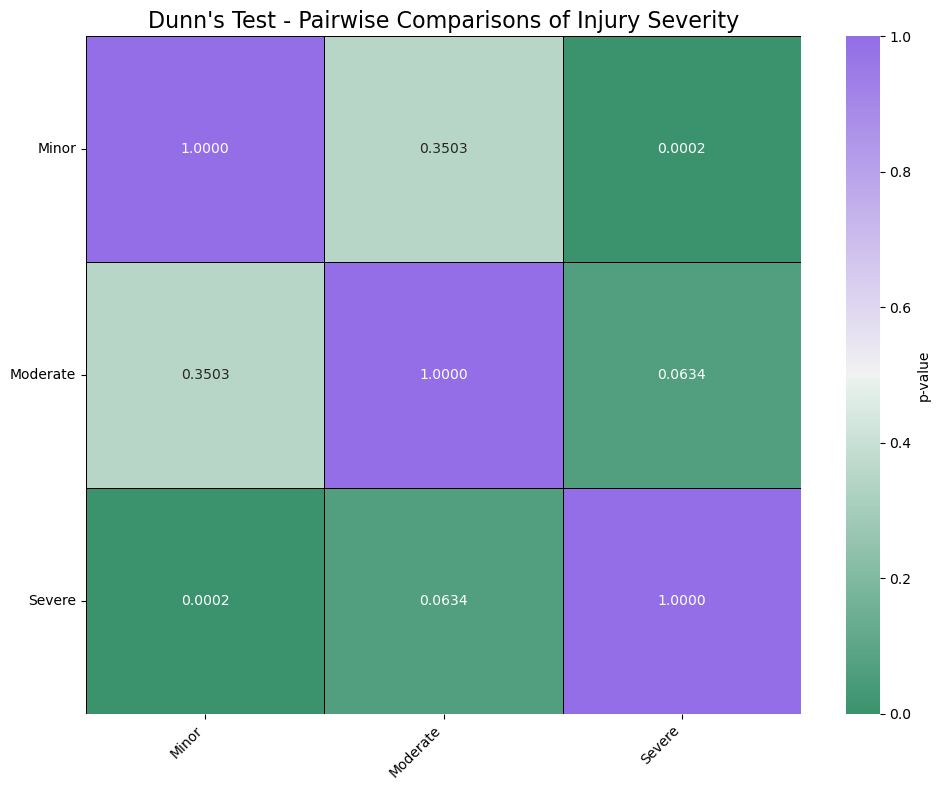

In [59]:
# Create the heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(
    dunn_pvalues,                      # your Dunn test p-values table
    annot=True,                        # show the p-value numbers
    fmt=".4f",                         # format p-values to 4 decimal places
    cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True), # nice green-gray palette
    vmin=0, vmax=1,                    # p-values are between 0 and 1
    cbar_kws={'label': 'p-value'},      # colorbar label
    linewidths=0.5,                    # lines between squares
    linecolor='black'
)

plt.title('Dunn\'s Test - Pairwise Comparisons of Injury Severity', fontsize=16)
plt.yticks(rotation=0)  # Make y labels horizontal
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.tight_layout()
plt.show()

## Checking if there is a relationship between Department and Injury_Type (Chi-Square Test of Independence):

#### We can use the Chi-Square Test to check if there's a significant relationship between Department and Injury_Type

In [60]:
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame
contingency_table = pd.crosstab(df_copy['Department'], df_copy['Injury_Type'])

# Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

# Interpretation
if p_value < 0.05:
    print("There is a significant relationship between Department and Injury Type.")
else:
    print("There is no significant relationship between Department and Injury Type.")


Chi-Square Statistic: 103.5
P-Value: 0.0021890841407429394
Degrees of Freedom: 66
Expected Frequencies Table:
[[1.   0.25 0.25 0.25 0.25 0.25 0.25 0.5  0.25 0.5  0.5  0.75]
 [1.   0.25 0.25 0.25 0.25 0.25 0.25 0.5  0.25 0.5  0.5  0.75]
 [0.4  0.1  0.1  0.1  0.1  0.1  0.1  0.2  0.1  0.2  0.2  0.3 ]
 [0.4  0.1  0.1  0.1  0.1  0.1  0.1  0.2  0.1  0.2  0.2  0.3 ]
 [0.2  0.05 0.05 0.05 0.05 0.05 0.05 0.1  0.05 0.1  0.1  0.15]
 [0.6  0.15 0.15 0.15 0.15 0.15 0.15 0.3  0.15 0.3  0.3  0.45]
 [0.4  0.1  0.1  0.1  0.1  0.1  0.1  0.2  0.1  0.2  0.2  0.3 ]]
There is a significant relationship between Department and Injury Type.


The p-value of 0.0054 is less than the significance level of 0.05, indicating that there is a statistically significant relationship between "Department" and "Injury_Type". This suggests that injury types vary across different departments.

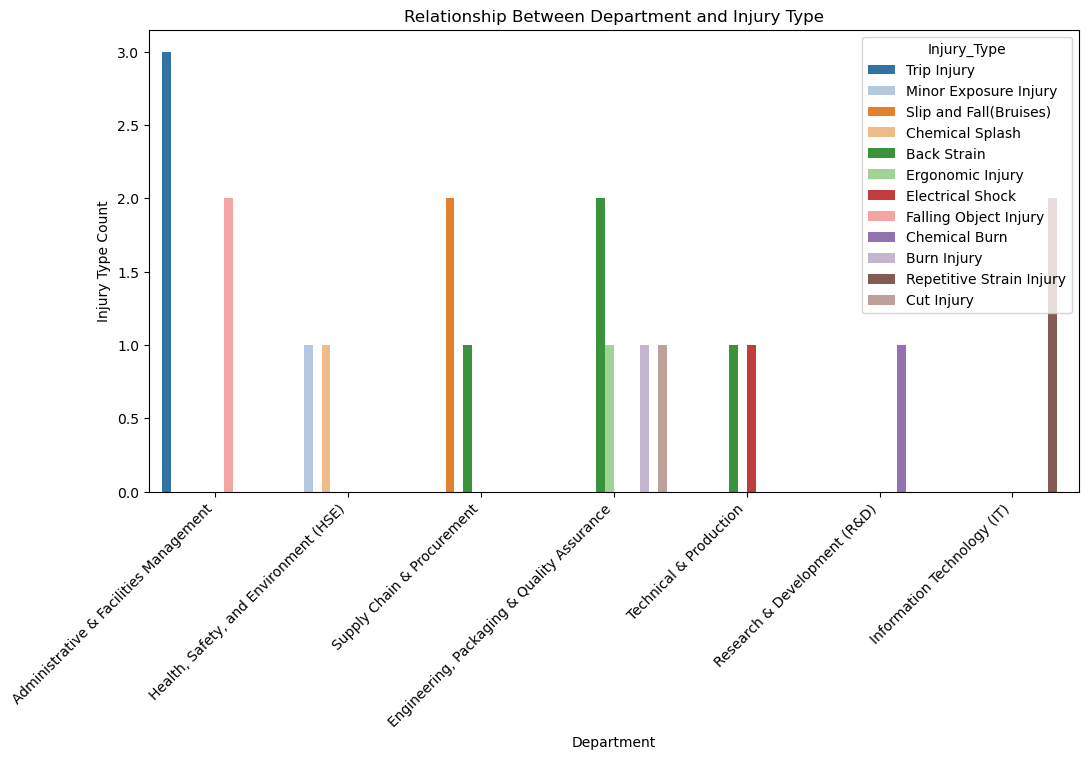

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_copy, x='Department', hue='Injury_Type', palette= 'tab20')
plt.xticks(rotation=45, ha='right')
plt.title('Relationship Between Department and Injury Type')
plt.xlabel('Department')
plt.ylabel('Injury Type Count')
plt.show()

## Relationship between Injury_Severity and Shift (Chi-Square Test of Independence):
We'll use the Chi-Square Test again to check if there's a significant relationship between Injury_Severity and Shift.

In [62]:
# Contingency table for Injury_Severity and Shift
contingency_table_2 = pd.crosstab(df_copy['Injury_Severity'], df_copy['Shift'])

# Perform Chi-Square Test
chi2_2, p_value_2, dof_2, expected_2 = chi2_contingency(contingency_table_2)

# Output the results
print(f"Chi-Square Statistic: {chi2_2}")
print(f"P-Value: {p_value_2}")
print(f"Degrees of Freedom: {dof_2}")
print(f"Expected Frequencies Table:\n{expected_2}")

# Interpretation
if p_value_2 < 0.05:
    print("There is a significant relationship between Injury Severity and Shift.")
else:
    print("There is no significant relationship between Injury Severity and Shift.")


Chi-Square Statistic: 0.6666666666666666
P-Value: 0.9553750807650524
Degrees of Freedom: 4
Expected Frequencies Table:
[[1.5 1.5 3. ]
 [1.5 1.5 3. ]
 [2.  2.  4. ]]
There is no significant relationship between Injury Severity and Shift.


### Checking if there's a relationship between Department and Injury occurence

In [63]:
# Create a contingency table
dept_injury_table = pd.crosstab(df_copy['Department'], df_copy['Injury_Occurrence'])

chi2_3, p_value_3, dof_3, expected_3 = chi2_contingency(dept_injury_table)

print(f"Chi-Square Test Statistic: {chi2_3:.4f}")
print(f"p-value: {p_value_3:.4f}")

if p_value_3 < 0.05:
    print("✅ There is a significant relationship between Department and Injury Occurrence.")
else:
    print("❌ No significant relationship between Department and Injury Occurrence.")


Chi-Square Test Statistic: 0.0000
p-value: 1.0000
❌ No significant relationship between Department and Injury Occurrence.


## Are certain job roles getting certain types of injuries?

In [64]:
# Create contingency table
jobrole_injurytype_table = pd.crosstab(df_copy['Job_Role'], df_copy['Injury_Type'])

# Chi-Square Test
chi2_4, p_value_4, dof_4, expected_4 = chi2_contingency(jobrole_injurytype_table)

print(f"Chi-Square Test Statistic: {chi2_4:.4f}")
print(f"p-value: {p_value_4:.4f}")

if p_value_4 < 0.05:
    print("✅ Job Role and Injury Type are significantly related.")
else:
    print("❌ No significant relationship between Job Role and Injury Type.")


Chi-Square Test Statistic: 220.0000
p-value: 0.0004
✅ Job Role and Injury Type are significantly related.


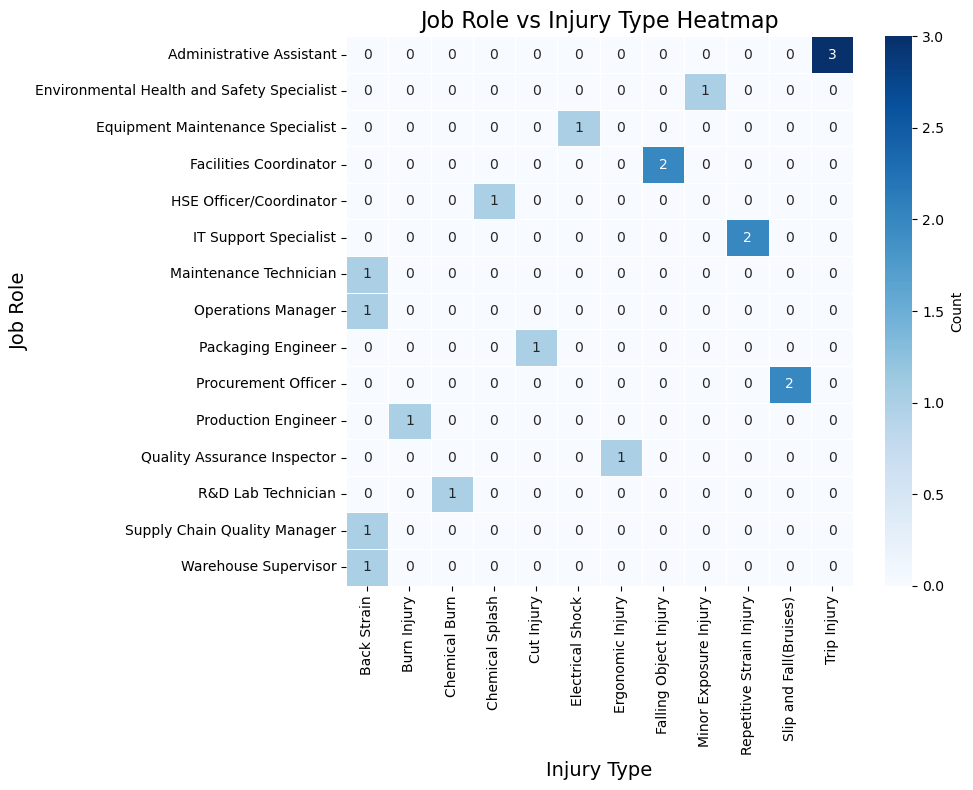

In [65]:
# Create a contingency table for Job Role vs Injury Type
contingency_table_job_injury = pd.crosstab(df_copy['Job_Role'], df_copy['Injury_Type'])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    contingency_table_job_injury, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    cbar_kws={'label': 'Count'},
    linewidths=0.5
)
plt.title('Job Role vs Injury Type Heatmap', fontsize=16)
plt.ylabel('Job Role', fontsize=14)
plt.xlabel('Injury Type', fontsize=14)
plt.tight_layout()
plt.show()


## Are severe injuries happening more often on certain shifts

In [66]:
# Create contingency table
severity_shift_table = pd.crosstab(df_copy['Injury_Severity'], df_copy['Shift'])

# Chi-Square Test
chi2_5, p_value_5, dof_5, expected_5 = chi2_contingency(severity_shift_table)

print(f"Chi-Square Test Statistic: {chi2_5:.4f}")
print(f"p-value: {p_value_5:.4f}")

if p_value_5 < 0.05:
    print("✅ Injury Severity and Shift are significantly related.")
else:
    print("❌ No significant relationship between Injury Severity and Shift.")


Chi-Square Test Statistic: 0.6667
p-value: 0.9554
❌ No significant relationship between Injury Severity and Shift.


## PPE Compliance Score vs Years of Experience (Spearman Correlation)
Are more experienced employees better at PPE compliance?

In [67]:
from scipy.stats import spearmanr

# Spearman correlation (for non-parametric data)
corr, p = spearmanr(df_copy['Years_of_Experience'], df_copy['PPE_Compliance_Score'])

print(f"Spearman Correlation Coefficient: {corr:.4f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("✅ Significant correlation between Experience and PPE Compliance.")
else:
    print("❌ No significant correlation between Experience and PPE Compliance.")


Spearman Correlation Coefficient: 0.4473
p-value: 0.0480
✅ Significant correlation between Experience and PPE Compliance.


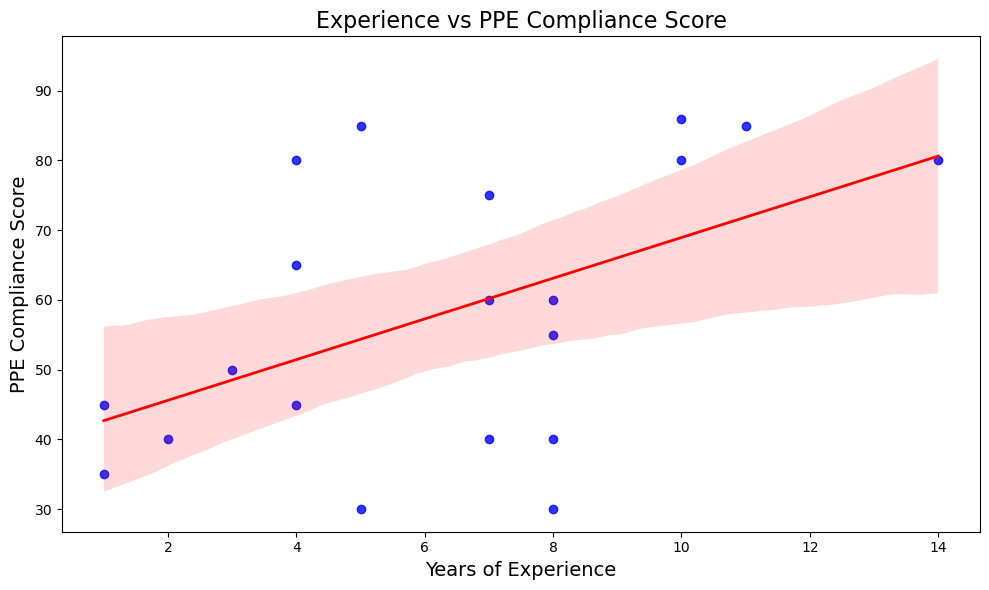

In [68]:
# Scatter plot with trendline for Experience vs PPE Compliance Score
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Years_of_Experience', 
    y='PPE_Compliance_Score', 
    data=df_copy, 
    scatter_kws={'color': 'blue'}, 
    line_kws={'color': 'red', 'linewidth': 2}
)
plt.title('Experience vs PPE Compliance Score', fontsize=16)
plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('PPE Compliance Score', fontsize=14)
plt.tight_layout()
plt.show()


## Injury Severity vs Years of Experience (Kruskal-Wallis Test)
(Are less experienced workers having more severe injuries?)

In [69]:
# Group PPE Compliance by Injury Severity
from scipy.stats import kruskal

groups = [group['Years_of_Experience'].values for name, group in df_copy.groupby('Injury_Severity')]

# Kruskal-Wallis Test
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("✅ Years of Experience significantly differs across Injury Severities.")
else:
    print("❌ No significant difference in Experience across Injury Severities.")


Kruskal-Wallis Test Statistic: 3.8486
p-value: 0.1460
❌ No significant difference in Experience across Injury Severities.


## Department vs PPE Compliance Score (Kruskal-Wallis Test)
(Are some departments worse at PPE compliance?)

In [70]:
groups = [group['PPE_Compliance_Score'].values for name, group in df_copy.groupby('Department')]

# Kruskal-Wallis Test
stat1, p1 = kruskal(*groups)

print(f"Kruskal-Wallis Test Statistic: {stat1:.4f}")
print(f"p-value: {p1:.4f}")

if p1 < 0.05:
    print("✅ PPE Compliance Scores significantly differ across Departments.")
else:
    print("❌ No significant difference in PPE Compliance Scores across Departments.")


Kruskal-Wallis Test Statistic: 7.2310
p-value: 0.3000
❌ No significant difference in PPE Compliance Scores across Departments.


## Injuries Over Time (Trend Analysis)
(Are injuries increasing or decreasing over time?)

C:\Users\USER.RASTEK\AppData\Local\Temp\ipykernel_16256\1407143588.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  injuries_per_month = df.resample('M', on='Date_of_Injury').size()


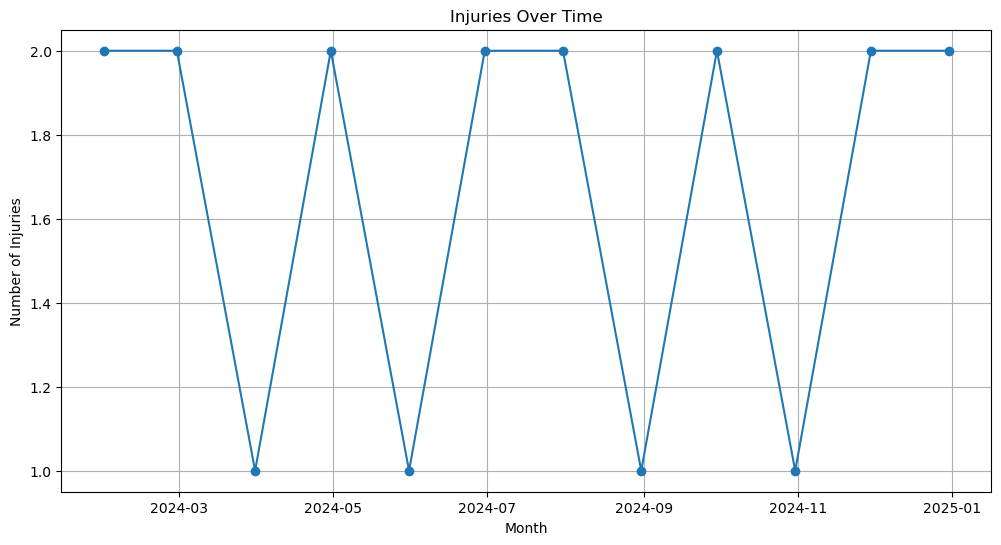

In [71]:
# Convert Date_of_Injury to datetime if not already
df['Date_of_Injury'] = pd.to_datetime(df['Date_of_Injury'])

# Create injuries per month
injuries_per_month = df.resample('M', on='Date_of_Injury').size()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(injuries_per_month, marker='o')
plt.title('Injuries Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.show()


## Checking if there's any correlation between Injury Severity and Experience
we'll convert Injury Severity to an ordered scale:

- Minor = 1
- Moderate = 2
- Severe = 3

Then check if there's a Spearman correlation between "Injury Severity" and "Years of Experience."

In [72]:
import pandas as pd
from scipy.stats import spearmanr

# Map Injury Severity to numbers
severity_mapping = {'Minor': 1, 'Moderate': 2, 'Severe': 3}
df_copy['Severity_Score'] = df_copy['Injury_Severity'].map(severity_mapping)

# Spearman Correlation
corr, p_value = spearmanr(df_copy['Severity_Score'], df_copy['Years_of_Experience'])

print(f"Spearman Correlation Coefficient: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Significant relationship between Injury Severity and Experience!")
else:
    print("❌ No significant relationship between Injury Severity and Experience.")


Spearman Correlation Coefficient: -0.4489
p-value: 0.0471
✅ Significant relationship between Injury Severity and Experience!


 There is a moderate negative correlation between Injury Severity and Years of Experience.
 As Injury Severity increases (from Minor → Moderate → Severe), the Years of Experience tends to decrease.
 The less experience someone has, the more likely they are to suffer a severe injury

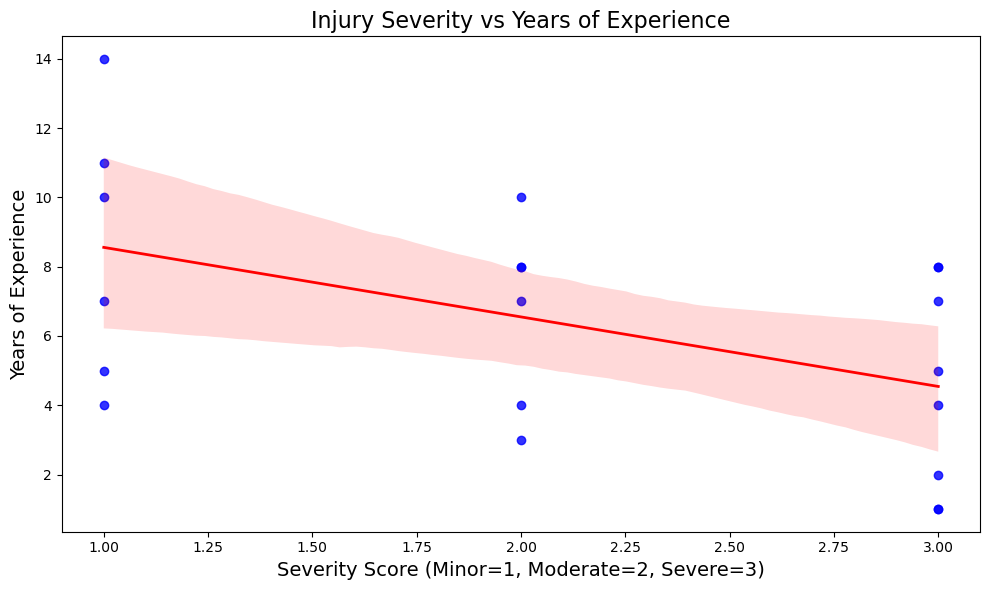

In [73]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Severity_Score', 
    y='Years_of_Experience', 
    data=df_copy, 
    scatter_kws={'color': 'blue'}, 
    line_kws={'color': 'red', 'linewidth': 2}
)
plt.title('Injury Severity vs Years of Experience', fontsize=16)
plt.xlabel('Severity Score (Minor=1, Moderate=2, Severe=3)', fontsize=14)
plt.ylabel('Years of Experience', fontsize=14)
plt.tight_layout()
plt.show()



## PPE Compliance by Shift 

C:\Users\USER.RASTEK\AppData\Local\Temp\ipykernel_16256\3005061808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy, x='Shift', y='PPE_Compliance_Score', palette='coolwarm')


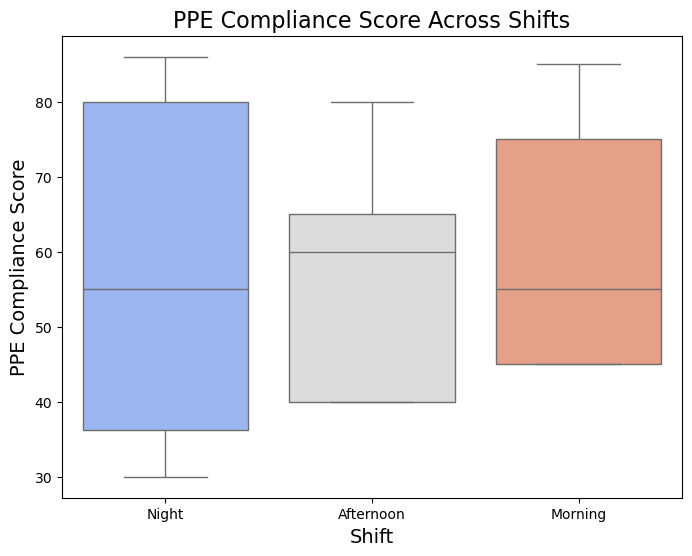

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_copy, x='Shift', y='PPE_Compliance_Score', palette='coolwarm')
plt.title('PPE Compliance Score Across Shifts', fontsize=16)
plt.xlabel('Shift', fontsize=14)
plt.ylabel('PPE Compliance Score', fontsize=14)
plt.show()

## Analyzing Years of Experience across Injury Types 

In [75]:
# Kruskal-Wallis Test
groups = [group['Years_of_Experience'].values for name, group in df_copy.groupby('Injury_Type')]

kruskal_test = kruskal(*groups)
print(f"Kruskal-Wallis Test Statistic: {kruskal_test.statistic:.4f}")
print(f"p-value: {kruskal_test.pvalue:.4f}")

if kruskal_test.pvalue < 0.05:
    print("✅ Significant difference in Years of Experience across Injury Types.")
else:
    print("❌ No significant difference in Years of Experience across Injury Types.")


Kruskal-Wallis Test Statistic: 9.0869
p-value: 0.6139
❌ No significant difference in Years of Experience across Injury Types.


## Analyzing PPE Compliance across Shifts (Kruskal-Wallis Test)

In [76]:
# Kruskal-Wallis Test
groups = [group['PPE_Compliance_Score'].values for name, group in df_copy.groupby('Shift')]

kruskal_test_shift = kruskal(*groups)
print(f"Kruskal-Wallis Test Statistic: {kruskal_test_shift.statistic:.4f}")
print(f"p-value: {kruskal_test_shift.pvalue:.4f}")

if kruskal_test_shift.pvalue < 0.05:
    print("✅ Significant difference in PPE Compliance Scores across Shifts.")
else:
    print("❌ No significant difference in PPE Compliance Scores across Shifts.")

Kruskal-Wallis Test Statistic: 0.1932
p-value: 0.9079
❌ No significant difference in PPE Compliance Scores across Shifts.


## PPE Compliance Scores across Injury Types (Kruskal-Wallis Test)

In [77]:
# Kruskal-Wallis Test
groups = [group['PPE_Compliance_Score'].values for name, group in df_copy.groupby('Injury_Type')]

kruskal_test_injurytype = kruskal(*groups)
print(f"Kruskal-Wallis Test Statistic: {kruskal_test_injurytype.statistic:.4f}")
print(f"p-value: {kruskal_test_injurytype.pvalue:.4f}")

if kruskal_test_injurytype.pvalue < 0.05:
    print("✅ Significant difference in PPE Compliance Scores across Injury Types.")
else:
    print("❌ No significant difference in PPE Compliance Scores across Injury Types.")

Kruskal-Wallis Test Statistic: 9.5493
p-value: 0.5713
❌ No significant difference in PPE Compliance Scores across Injury Types.


## PPE Compliance by Years of Experience Groupings

   Years_of_Experience Experience_Group
0                    1        1-2 years
1                   10       6-10 years
2                    5        3-5 years
3                   10       6-10 years
4                   11      11-14 years


C:\Users\USER.RASTEK\AppData\Local\Temp\ipykernel_16256\3111760604.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


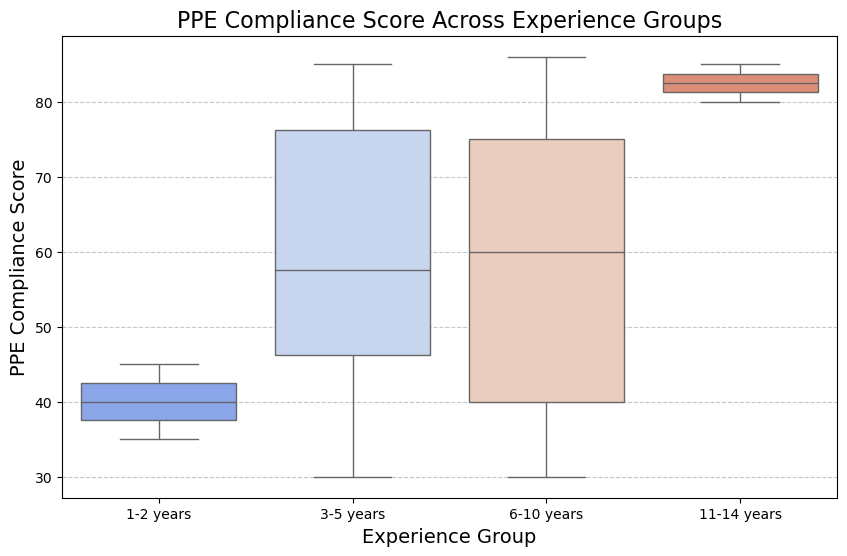

In [78]:
# Create New Experience Bins
experience_bins = [0, 2, 5, 10, 14]  # 0–2, 3–5, 6–10, 11–14
experience_labels = ['1-2 years', '3-5 years', '6-10 years', '11-14 years']
df_copy['Experience_Group'] = pd.cut(df['Years_of_Experience'], bins=experience_bins, labels=experience_labels, right=True)

# Quick check
print(df_copy[['Years_of_Experience', 'Experience_Group']].head())

# Boxplot: PPE Compliance Score vs Experience Group
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_copy,
    x='Experience_Group',
    y='PPE_Compliance_Score',
    palette='coolwarm'
)
plt.title('PPE Compliance Score Across Experience Groups', fontsize=16)
plt.xlabel('Experience Group', fontsize=14)
plt.ylabel('PPE Compliance Score', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 ## Correlation Matrix Heatmap

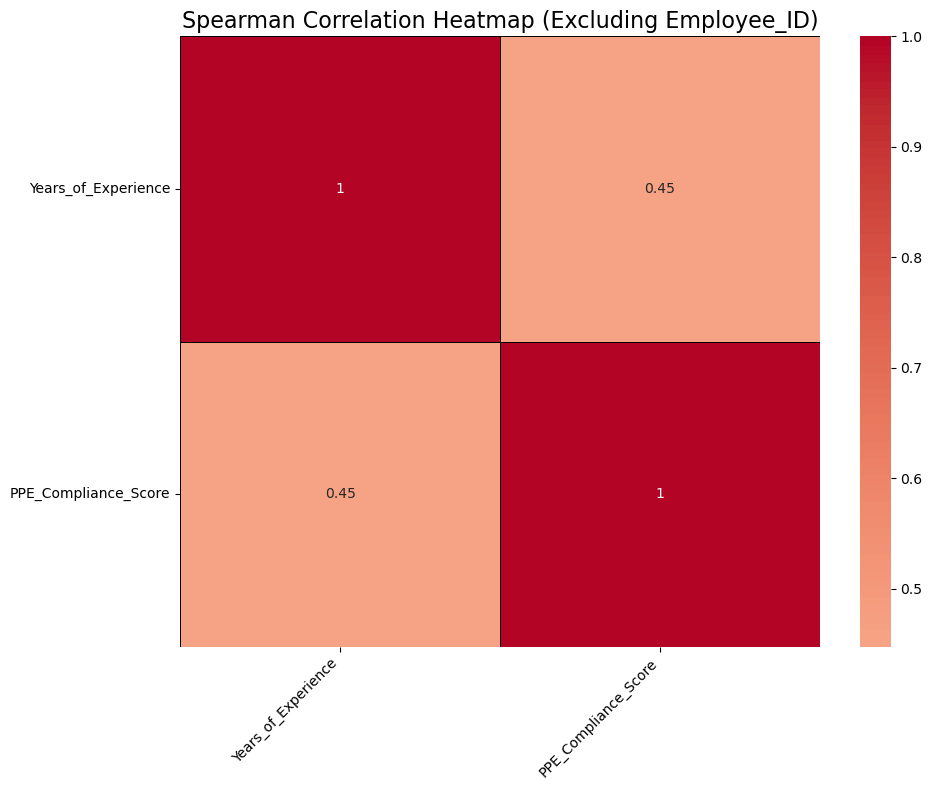

In [79]:

# Step 2: Drop Employee_ID first
corr_data = df_copy.drop(columns=['Employee_ID', 'Severity_Score'])

# Step 3: Keep only numeric columns
numeric_corr_data = corr_data.select_dtypes(include='number')

# Step 4: Compute the Spearman correlation matrix
corr_matrix = numeric_corr_data.corr(method='spearman')

# Step 5: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,           # Show correlation coefficients
    cmap='coolwarm',       # Red-blue color palette
    center=0,              # Center the colormap at zero
    linewidths=0.5,        # Line between squares
    linecolor='black'      # Color of the lines
)
plt.title('Spearman Correlation Heatmap (Excluding Employee_ID)', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=0)               # Horizontal y labels
plt.tight_layout()
plt.show()


In [80]:
df_copy

,Employee_ID,Department,Job_Role,Injury_Occurrence,Injury_Type,Injury_Severity,Date_of_Injury,Shift,Years_of_Experience,PPE_Compliance_Score,Severity_Score,Experience_Group
0,1,Administrative & Facilities Management,Administrative Assistant,Yes,Trip Injury,Severe,1/1/2024,Night,1,35,3,1-2 years
1,2,"Health, Safety, and Environment (HSE)",Environmental Health and Safety Specialist,Yes,Minor Exposure Injury,Minor,1/20/2024,Night,10,86,1,6-10 years
2,3,Supply Chain & Procurement,Procurement Officer,Yes,Slip and Fall(Bruises),Severe,2/8/2024,Night,5,30,3,3-5 years
3,4,"Health, Safety, and Environment (HSE)",HSE Officer/Coordinator,Yes,Chemical Splash,Moderate,2/27/2024,Night,10,80,2,6-10 years
4,5,Supply Chain & Procurement,Warehouse Supervisor,Yes,Back Strain,Minor,3/17/2024,Night,11,85,1,11-14 years
5,6,"Engineering, Packaging & Quality Assurance",Quality Assurance Inspector,Yes,Ergonomic Injury,Moderate,4/6/2024,Night,8,60,2,6-10 years
6,7,Technical & Production,Operations Manager,Yes,Back Strain,Moderate,4/25/2024,Afternoon,4,65,2,3-5 years
7,8,Technical & Production,Equipment Maintenance Specialist,Yes,Electrical Shock,Severe,5/14/2024,Night,2,40,3,1-2 years
8,9,Administrative & Facilities Management,Facilities Coordinator,Yes,Falling Object Injury,Moderate,6/2/2024,Night,3,50,2,3-5 years
9,10,Administrative & Facilities Management,Facilities Coordinator,Yes,Falling Object Injury,Minor,6/21/2024,Morning,7,75,1,6-10 years


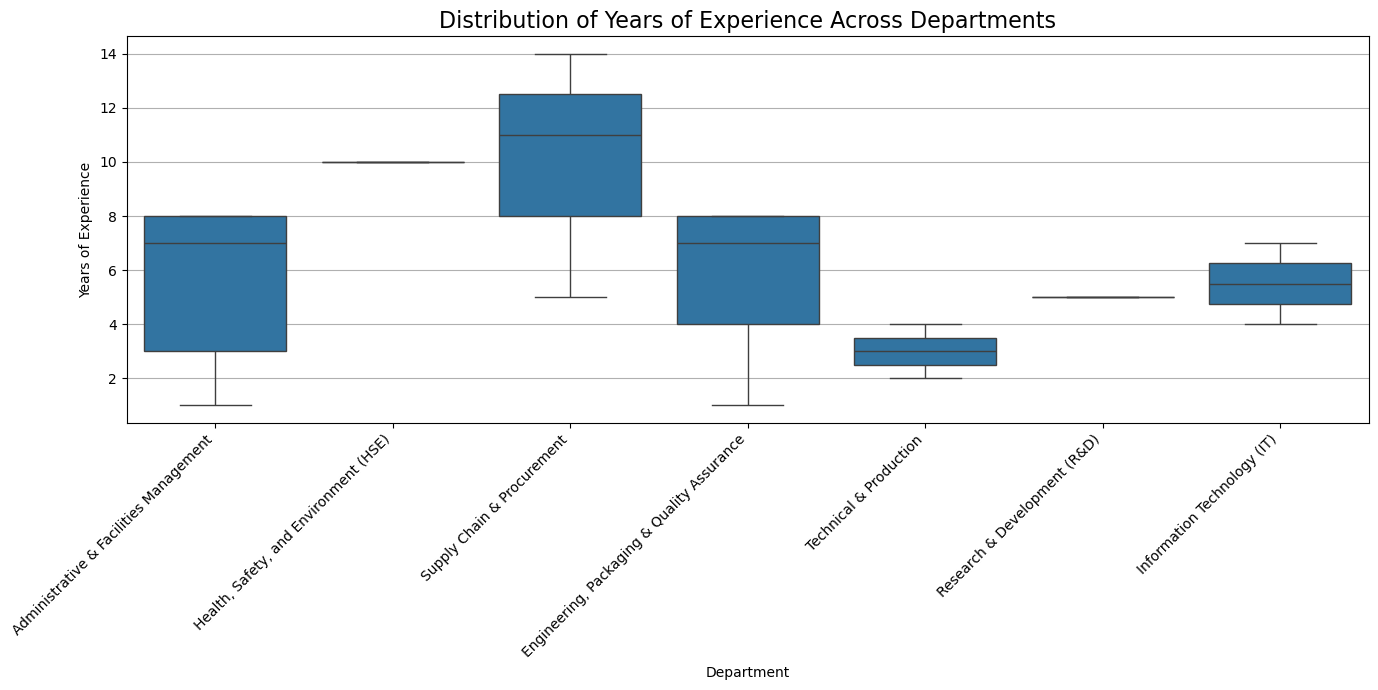

In [81]:


# Set figure size
plt.figure(figsize=(14, 7))

# Create the boxplot
sns.boxplot(data=df_copy, x='Department', y='Years_of_Experience')

# Beautify
plt.title('Distribution of Years of Experience Across Departments', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Years of Experience')
plt.xlabel('Department')
plt.grid(axis='y')
plt.tight_layout()

plt.show()


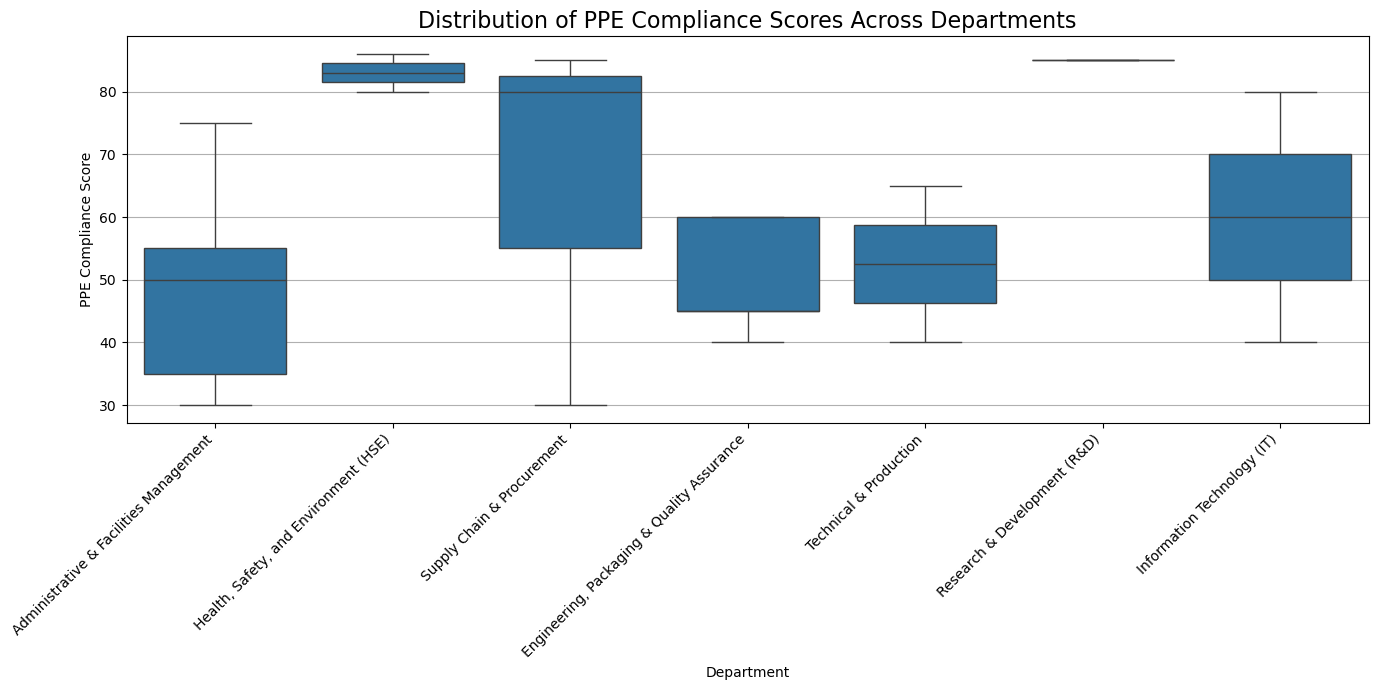

In [82]:
# Set figure size
plt.figure(figsize=(14, 7))

# Create the boxplot
sns.boxplot(data=df_copy, x='Department', y='PPE_Compliance_Score')

# Beautify
plt.title('Distribution of PPE Compliance Scores Across Departments', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('PPE Compliance Score')
plt.xlabel('Department')
plt.grid(axis='y')
plt.tight_layout()

plt.show()
